# Multivariate Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

The dataset kc_house_data contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

In [2]:
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Theory/master/Data/kc_house_data.csv'
data = pd.read_csv(url)
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
# size of the dataset
m = len(data)
m

21613

In [4]:
# column names
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

**Data Description**

| Feature | Description |
| :- | -: |
| id | Unique ID for each home sold |
| date | Date of the home sale |
| price | Price of each home sold |
| bedrooms | Number of bedrooms |
| bathrooms | Number of bathrooms, where .5 accounts for a room with a toilet but no shower |
| sqft_living | Square footage of the apartments interior living space |
| sqft_lot | Square footage of the land space |
| floors | Number of floors |
| waterfront | A dummy variable for whether the apartment was overlooking the waterfront or not |
| view | An index from 0 to 4 of how good the view of the property was |
| condition | An index from 1 to 5 on the condition of the apartment |
| grade | An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design |
| sqft_above | The square footage of the interior housing space hat is above ground level |
| sqft_basement | The square footage of the interior housing space that is below ground level |
| yr_built | The year the house was initially built |
| yr_renovated | The year of the house's last renovation |
| zipcode | What zipcode area the house is in |
| lat | Latitude |
| long | Longitude |
| sqft_living15 | The square footage of interior housing living space for the nearest 15 neighbors |
| sqft_lot15 | The square footage of the land lots of the nearest 15 neighbors |

## Fitting a linear model to the data

**Goal:** Use bedrooms, bathrooms, sqft_living,..., lat, long to predict the price.

In [5]:
features = ['bathrooms','sqft_living','sqft_lot','waterfront','view',
            'condition','sqft_above','sqft_basement','yr_built',
            'yr_renovated','lat','long']

In [6]:
len(features)

12

Let's fit the model

$$
\mathrm{price} = \theta_0 + \theta_1\mathrm{bathrooms}+\cdots+\theta_{11}\mathrm{lat}+\theta_{12}\mathrm{long}
$$
to the data

In [7]:
# feature matrix X / target vector y
X = np.ones((m,13))
X[:,1:13] = data[features].to_numpy()
#X = np.c_[np.ones(m),X] # add bias
y = data['price'].to_numpy()

In [8]:
X.shape, y.shape

((21613, 13), (21613,))

In [9]:
'fit a linear model to the data'
theta = np.linalg.solve(X.T.dot(X),X.T.dot(y))

In [10]:
'use the linear model to predict the vector y'
y_pred = X.dot(theta)

## Visualizing the predictions

Text(0, 0.5, 'price')

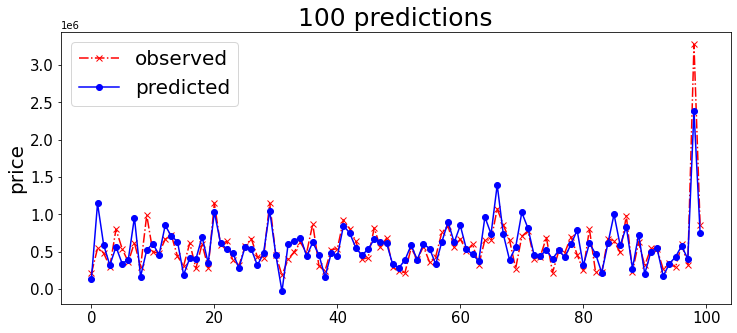

In [11]:
# Way 1: plot, for example, 100 predictions
plt.figure(figsize=(12,5))

indices = np.random.choice(m,100) # 100 random integers 

plt.plot(y[indices],'rx-.', label = 'observed')
plt.plot(y_pred[indices],'bo-',label = 'predicted')
plt.legend(fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('100 predictions',fontsize=25)
plt.ylabel('price',fontsize=20)

Text(0, 0.5, 'predicted')

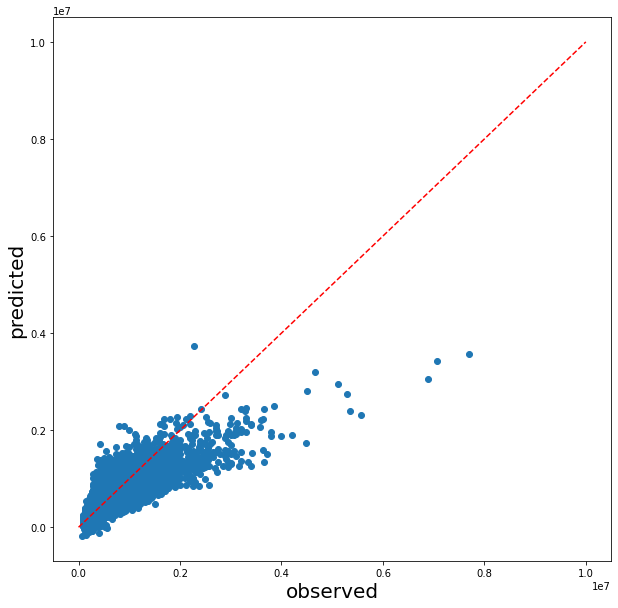

In [12]:
# way 2: plot observed prices against predicted prices
plt.figure(figsize=(10,10))
plt.plot(y,y_pred,'o')
plt.plot([0,1e7],[0,1e7],'r--')
plt.xlabel('observed',fontsize=20)
plt.ylabel('predicted',fontsize=20)

## Fitting a polynomial model

In [13]:
X = data[features].to_numpy()

In [14]:
m, n = X.shape

Before adding polynomial features, it is always a good idea to scale the data.

In [15]:
means = X.mean(axis=0) # mean along rows (axis=0)
s = X.std(axis=0) # standard deviation along rows
X = (X-means)/s # remove the mean and scale to unit variance

Let's add polynomial features

In [16]:
from itertools import chain
from itertools import combinations_with_replacement as comb_w_r

In [17]:
degree = 3
for comb in chain.from_iterable(comb_w_r(range(n), i) for i in range(1,degree+1)):
    print(comb)

(0,)
(1,)
(2,)
(3,)
(4,)
(5,)
(6,)
(7,)
(8,)
(9,)
(10,)
(11,)
(0, 0)
(0, 1)
(0, 2)
(0, 3)
(0, 4)
(0, 5)
(0, 6)
(0, 7)
(0, 8)
(0, 9)
(0, 10)
(0, 11)
(1, 1)
(1, 2)
(1, 3)
(1, 4)
(1, 5)
(1, 6)
(1, 7)
(1, 8)
(1, 9)
(1, 10)
(1, 11)
(2, 2)
(2, 3)
(2, 4)
(2, 5)
(2, 6)
(2, 7)
(2, 8)
(2, 9)
(2, 10)
(2, 11)
(3, 3)
(3, 4)
(3, 5)
(3, 6)
(3, 7)
(3, 8)
(3, 9)
(3, 10)
(3, 11)
(4, 4)
(4, 5)
(4, 6)
(4, 7)
(4, 8)
(4, 9)
(4, 10)
(4, 11)
(5, 5)
(5, 6)
(5, 7)
(5, 8)
(5, 9)
(5, 10)
(5, 11)
(6, 6)
(6, 7)
(6, 8)
(6, 9)
(6, 10)
(6, 11)
(7, 7)
(7, 8)
(7, 9)
(7, 10)
(7, 11)
(8, 8)
(8, 9)
(8, 10)
(8, 11)
(9, 9)
(9, 10)
(9, 11)
(10, 10)
(10, 11)
(11, 11)
(0, 0, 0)
(0, 0, 1)
(0, 0, 2)
(0, 0, 3)
(0, 0, 4)
(0, 0, 5)
(0, 0, 6)
(0, 0, 7)
(0, 0, 8)
(0, 0, 9)
(0, 0, 10)
(0, 0, 11)
(0, 1, 1)
(0, 1, 2)
(0, 1, 3)
(0, 1, 4)
(0, 1, 5)
(0, 1, 6)
(0, 1, 7)
(0, 1, 8)
(0, 1, 9)
(0, 1, 10)
(0, 1, 11)
(0, 2, 2)
(0, 2, 3)
(0, 2, 4)
(0, 2, 5)
(0, 2, 6)
(0, 2, 7)
(0, 2, 8)
(0, 2, 9)
(0, 2, 10)
(0, 2, 11)
(0, 3, 3)
(0, 3, 4)
(0, 3, 5)


In [33]:
# number of polynomial features
degree = 3
combinations  = chain.from_iterable(comb_w_r(range(n), i) for i in range(1, degree+1))
n_poly = sum(1 for comb in combinations)
n_poly

454

In [34]:
# polynomial features
combinations  = chain.from_iterable(comb_w_r(range(n), i) for i in range(1, degree+1))
XP = np.ones((m,n_poly))
for col_idx,combination in enumerate(combinations):  
    for idx in combination:
        XP[:,col_idx]= XP[:,col_idx]*X[:,idx]

In [35]:
# add bias
XP = np.c_[np.ones(m),XP]

In [36]:
# fit a linear model to the data
theta = np.linalg.solve(XP.T.dot(XP),XP.T.dot(y))

In [37]:
# use the linear model to predict the vector y
y_pred = XP.dot(theta)

Text(0, 0.5, 'price')

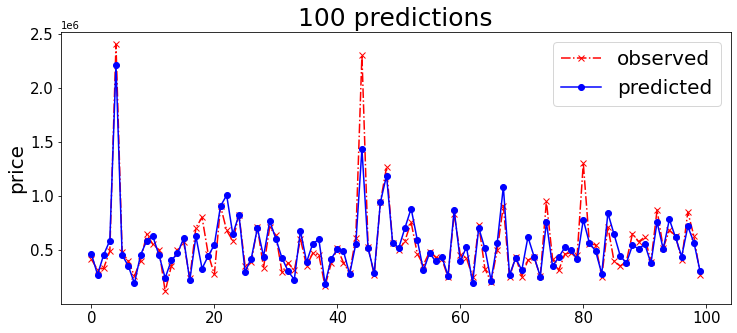

In [38]:
# plot, for example, 100 predictions
plt.figure(figsize=(12,5))

indices = np.random.choice(m,100) # 100 random integers 

plt.plot(y[indices],'rx-.', label = 'observed')
plt.plot(y_pred[indices],'bo-',label = 'predicted')
plt.legend(fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('100 predictions',fontsize=25)
plt.ylabel('price',fontsize=20)

Text(0, 0.5, 'predicted')

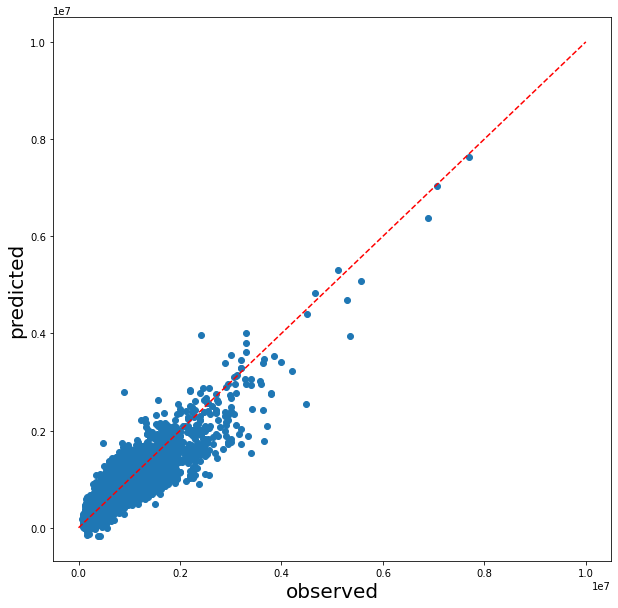

In [39]:
# plot observed prices against predicted prices
plt.figure(figsize=(10,10))
plt.plot(y,y_pred,'o')
plt.plot([0,1e7],[0,1e7],'r--')
plt.xlabel('observed',fontsize=20)
plt.ylabel('predicted',fontsize=20)